In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../build/lib.linux-x86_64-3.6/')
from pymcc_lidar import classify, calculate_excess_height

In [3]:
from pymccrgb.ioutils import read_las

In [4]:
data = read_las('data/points_rgb.laz')[:, 0:3]

In [5]:
data.shape

(50591, 3)

In [13]:
scale = 1
tol = 0.3

In [14]:
dz = calculate_excess_height(data.copy(order='C'), scale)
np.save('output/height_1iter_s10_t0_3_lu_subsamp10.npy', dz)

In [15]:
labels = classify(data.copy(order='C'), scale, tol)
np.save('output/labels_s10_t0_3_lu_subsamp10.npy', labels)

In [16]:
dz_true = np.load('output/height_1iter_s1_t0_3_lu_noreg.npy')
labels_true = np.load('output/labels_s1_t0_3_lu_noreg.npy')

Text(0.5, 1.0, 'LU result')

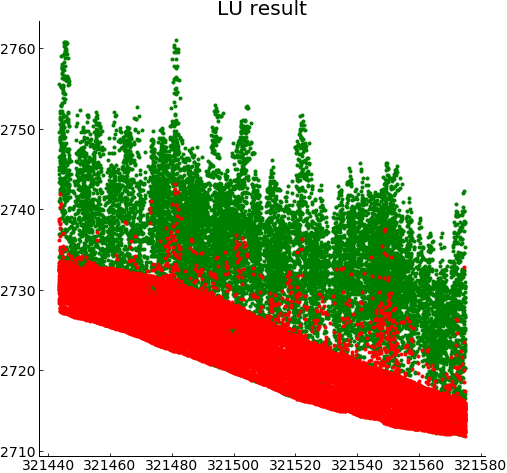

In [17]:
plt.plot(data[labels_true == 1, 0], data[labels_true == 1, 2], 'g.')
plt.plot(data[labels_true == 2, 0], data[labels_true == 2, 2], 'r.')
plt.title('LU result')

Text(0.5, 1.0, 'Subsampling result (f = 10)')

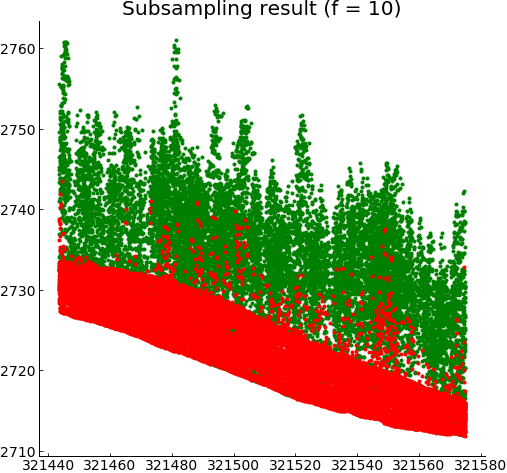

In [18]:
plt.plot(data[labels == 1, 0], data[labels == 1, 2], 'g.')
plt.plot(data[labels == 2, 0], data[labels == 2, 2], 'r.')
plt.title('Subsampling result (f = 10)')

Text(0, 0.5, '$\\Delta$z from subsampling')

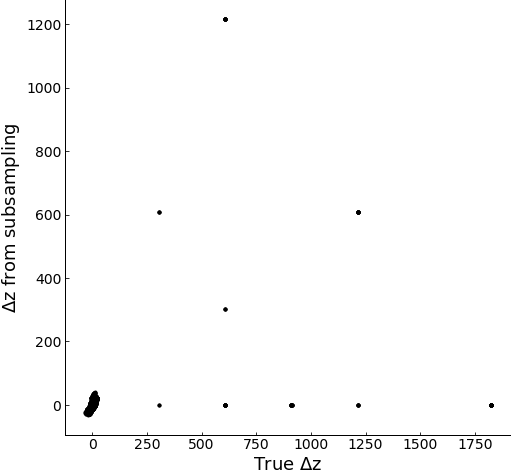

In [19]:
plt.plot(dz_true, dz, 'k.')
plt.xlabel('True $\Delta$z')
plt.ylabel('$\Delta$z from subsampling')